In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [3]:
# Reshape to (28,28,1) because MNIST is grayscale
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [4]:
# Normalize (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# One-hot encode labels (0–9 digits)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test,10)

In [6]:
print("Training data shape:",X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [7]:
# 2. Define CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10 classes (digits 0–9)
])

C:\Users\shubham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 3. Compile Model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [9]:
# 4. Train Model
hsitory = model.fit(X_train,Y_train,
                    epochs = 5,
                    batch_size = 64,
                    validation_data = (X_test,Y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8591 - loss: 0.4419 - val_accuracy: 0.9784 - val_loss: 0.0672
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9802 - loss: 0.0654 - val_accuracy: 0.9860 - val_loss: 0.0442
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9876 - loss: 0.0422 - val_accuracy: 0.9883 - val_loss: 0.0365
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.9887 - val_loss: 0.0359
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9926 - loss: 0.0247 - val_accuracy: 0.9891 - val_loss: 0.0349


In [10]:
# 5. Evaluate Model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0423
Test Accuracy: 0.9890999794006348
Test Loss: 0.03491997718811035


In [11]:
idx = random.randint(0, len(X_test)-1)  # random test index
test_img = X_test[idx].reshape(1,28,28,1)

In [12]:
pred = model.predict(test_img)
predicted_label = np.argmax(pred)
true_label = np.argmax(Y_test[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


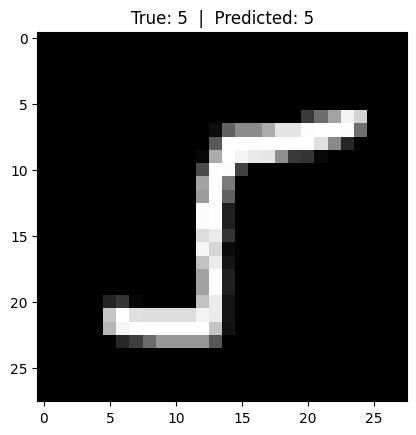

In [13]:
# Show image with prediction
plt.imshow(X_test[idx].reshape(28,28), cmap="gray")
plt.title(f"True: {true_label}  |  Predicted: {predicted_label}")
plt.show()